In [14]:
import pandas as pd
import sys
import scipy
import numpy as np
import matplotlib
import sklearn 
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/chrisgmartin/DATA607/master/imports-85.csv"
names = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-rate","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(url, names=names)

In [3]:
df = df[['make','body-style', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price']]

In [4]:
df.head()

,make,body-style,wheel-base,length,width,height,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,130,111,21,27,13495
1,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,130,111,21,27,16500
2,alfa-romero,hatchback,94.5,171.2,65.5,52.4,2823,152,154,19,26,16500
3,audi,sedan,99.8,176.6,66.2,54.3,2337,109,102,24,30,13950
4,audi,sedan,99.4,176.6,66.4,54.3,2824,136,115,18,22,17450


In [6]:
print(df.groupby('body-style').size())

body-style
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
dtype: int64


In [35]:
scaler = preprocessing.MinMaxScaler()
norm = df[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price']]
norm = norm.apply(pd.to_numeric, args=('coerce',))
norm = norm.dropna()
scaler = preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(norm)
df_norm = pd.DataFrame(np_scaled)
df_norm['make'] = df['make']
df_norm = df_norm.copy()

In [36]:
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,make
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.294393,0.222222,0.289474,0.207959,alfa-romero
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.294393,0.222222,0.289474,0.282558,alfa-romero
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.495327,0.166667,0.263158,0.282558,alfa-romero
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.252336,0.305556,0.368421,0.219254,audi
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.313084,0.138889,0.157895,0.306142,audi


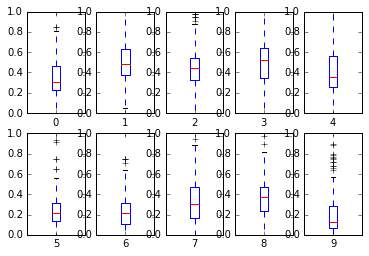

In [37]:
df_norm.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False)
plt.show()

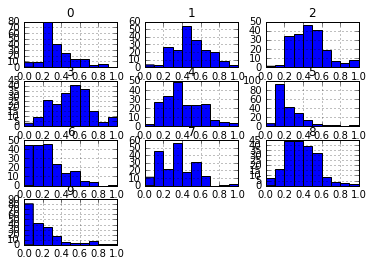

In [38]:
df_norm.hist()
plt.show()

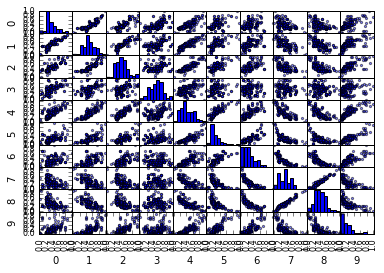

In [39]:
scatter_matrix(df_norm)
plt.show()

In [40]:
array = df_norm.values
X = array[:,0:10]
Y = array[:,10]
validation_size = 0.2
seed = 7 
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [45]:
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.201250 (0.095925)
LDA: 0.376250 (0.143663)
KNN: 0.402917 (0.152013)
CART: 0.666250 (0.161540)
NB: 0.251667 (0.125100)


C:\Users\J.X\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


SVM: 0.169583 (0.083688)


In [46]:
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.65
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 2 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
               precision    recall  f1-score   support

  alfa-romero       0.00      0.00      0.00         1
          bmw       1.00      1.00      1.00         1
    chevrolet       0.00      0.00      0.00         0
        dodge       0.33      0.50      0.40         2
        honda   

C:\Users\J.X\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\J.X\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
